# Helper functions

In [1]:
import numpy as np
import cv2
import tifffile
import h5py
import os
import matplotlib.pyplot as plt
from ipywidgets import interact

from vis_utils import *

## First, read the locations from DLC (2d)

In [3]:
which_neuron = 3
num_frames = 100
sz=(18,18)

In [8]:
# Raw video
folder_name = '/users/charles.fieseler/test_worm1_data/mCherry_slices_long/'
fname = 'test_1000frames_13sliceDLC_resnet50_WormTestJul16shuffle1_34000.h5'
annotation_fname = os.path.join(folder_name, fname)

this_xy, this_prob = xy_from_dlc_dat(annotation_fname, which_neuron=which_neuron, num_frames=num_frames)

Text(0.5, 1.0, 'Confidence')

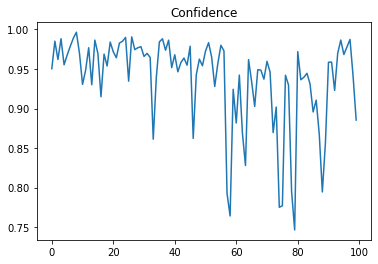

In [9]:
plt.plot(this_prob)
plt.title('Confidence')

## Second, get a moving crop centering this neuron (2d)

In [10]:
folder_name = '/users/charles.fieseler/test_worm1_data/mCherry_slices_long/'
fname = 'test_1000frames_13slice.avi'
video_fname = os.path.join(folder_name, fname)

cropped_dat = get_crop_from_avi(video_fname, this_xy, num_frames, sz=sz)

In [11]:
from ipywidgets import interact, interactive, fixed, interact_manual
f = lambda i : plt.imshow(cropped_dat[:,:,0,i])
interact(f, i=(0,num_frames-1))

interactive(children=(IntSlider(value=49, description='i', max=99), Output()), _dom_classes=('widget-interact'…

<function __main__.<lambda>(i)>

## Next, 3d 

In [12]:
which_z = 13 # The actually tracked slice
num_frames = 50
sz=(28,28,10)

In [13]:
folder_name = '/users/charles.fieseler/test_worm1_data/mCherry/' # NOTE: different folder, but same video
fname = 'test_100frames.ome.tiff'
video3d_fname = os.path.join(folder_name, fname)

cropped_dat = get_crop_from_ometiff(video3d_fname, this_xy, which_z, num_frames, sz)

Reading video...
Reading frame 0/49
Reading frame 1/49
Reading frame 2/49
Reading frame 3/49
Reading frame 4/49
Reading frame 5/49
Reading frame 6/49
Reading frame 7/49
Reading frame 8/49
Reading frame 9/49
Reading frame 10/49
Reading frame 11/49
Reading frame 12/49
Reading frame 13/49
Reading frame 14/49
Reading frame 15/49
Reading frame 16/49
Reading frame 17/49
Reading frame 18/49
Reading frame 19/49
Reading frame 20/49
Reading frame 21/49
Reading frame 22/49
Reading frame 23/49
Reading frame 24/49
Reading frame 25/49
Reading frame 26/49
Reading frame 27/49
Reading frame 28/49
Reading frame 29/49
Reading frame 30/49
Reading frame 31/49
Reading frame 32/49
Reading frame 33/49
Reading frame 34/49
Reading frame 35/49
Reading frame 36/49
Reading frame 37/49
Reading frame 38/49
Reading frame 39/49
Reading frame 40/49
Reading frame 41/49
Reading frame 42/49
Reading frame 43/49
Reading frame 44/49
Reading frame 45/49
Reading frame 46/49
Reading frame 47/49
Reading frame 48/49
Reading frame

In [15]:
f = lambda z, t : plt.imshow(cropped_dat[:,:,z,t])
interact(f, **{'t':(0,num_frames-1), 'z':(0,sz[2]-1)})

interactive(children=(IntSlider(value=4, description='z', max=9), IntSlider(value=24, description='t', max=49)…

<function __main__.<lambda>(z, t)>